In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Dataset

In [2]:
df = pd.read_csv('banknotes.csv')

display(df.info())
display(df.head())
display(df.describe())

display(df['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variace     1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


None

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


0    762
1    610
Name: class, dtype: int64

In [3]:
from sklearn.preprocessing import scale

X = scale(df.drop('class', axis=1).values)
y = df['class'].values

display(X.shape)
display(y.shape)

(1372, 4)

(1372,)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=42)

## Model

In [5]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

K.clear_session()

model = Sequential()

model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

Using TensorFlow backend.


## Visualize Inner layer

412/412 [==============================] - 0s 80us/step


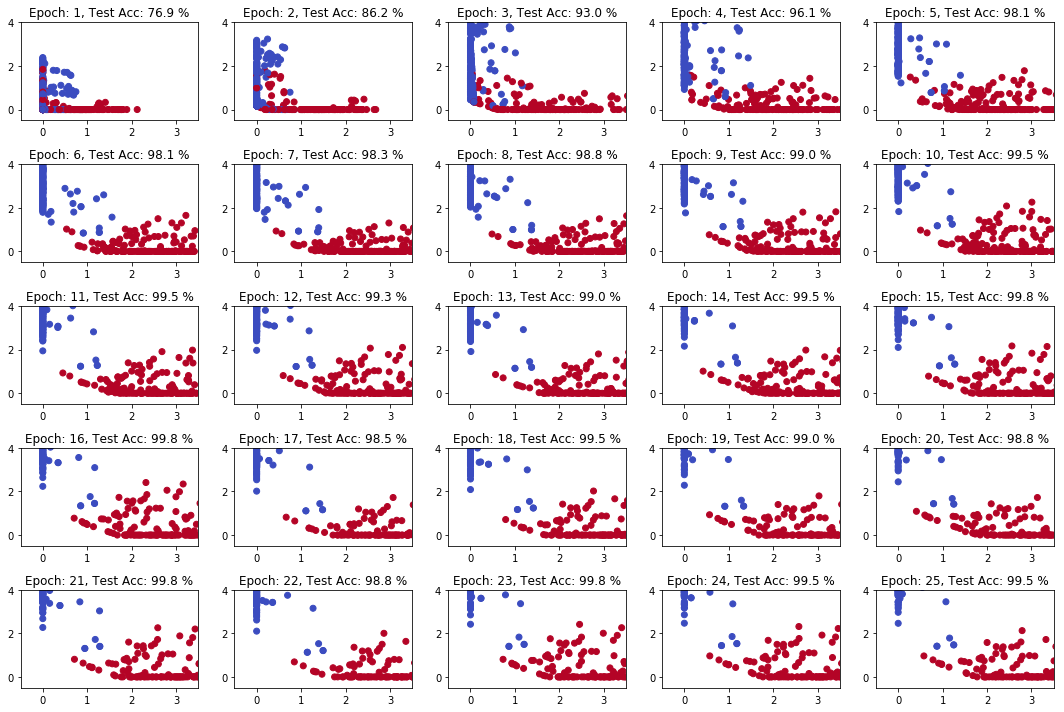

In [6]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    
    # Fit model
    h = model.fit(
        X_train, y_train,
        epochs=1, verbose=0)
    
    # Evaluate test set accuracy
    test_accuracy = model.evaluate(X_test, y_test)[1]
    
    features = features_function([X_test])[0]
    plt.scatter(
        features[:, 0], features[:, 1],
        c=y_test, cmap='coolwarm')

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()